## Задание 1

In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [108]:
def generator(n):
    arr = []
    for i in range (0,n):
        A = np.random.rand(5,5)
        for j in range (0, 5):
            A[j] = A[j,:]/sum(A[j,:])
        arr.append(A)
    
    return arr

In [109]:
samples = generator(20)

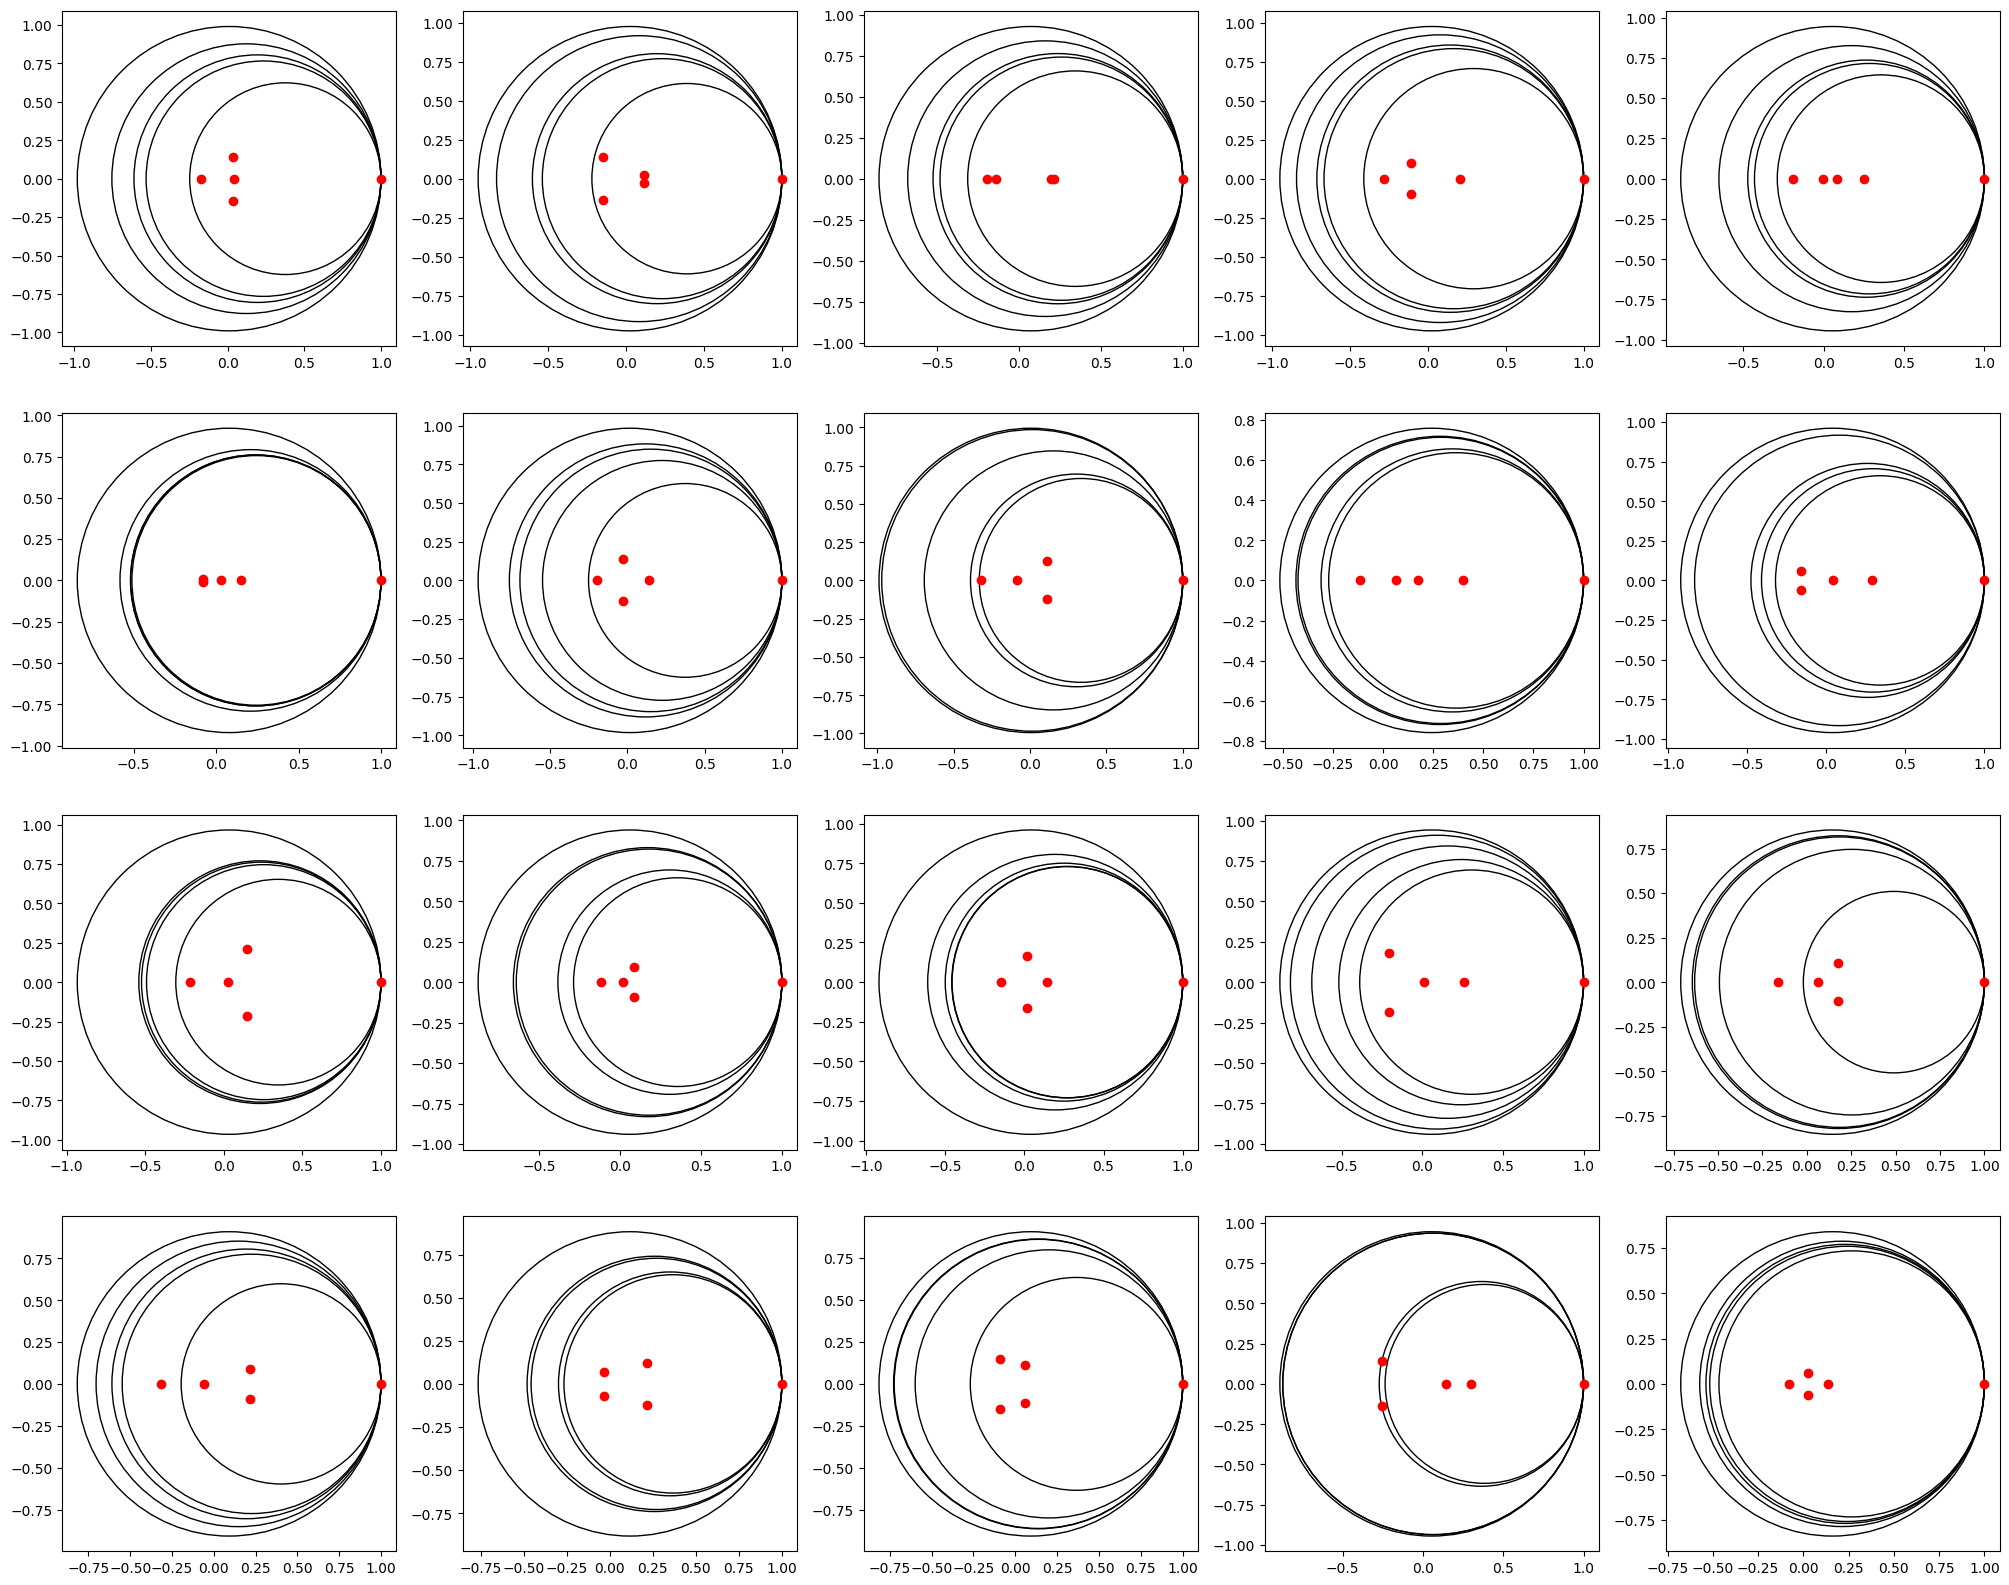

In [111]:
fig, ax = plt.subplots(4, 5)
fig.set_size_inches(25, 20)
for n, elem in enumerate(samples):
    k = n//5
    m = n%5
    xg = np.diag(elem).real
    yg = np.diag(elem).imag
    rg = np.zeros(np.shape(elem)[0])
    ev = np.linalg.eigvals(elem)
    for i in range(0,5):
        rg[i] = np.sum(np.abs(elem[i, :])) - np.abs(elem[i, i])
        crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
        ax[k, m].add_patch(crc)
    ax[k, m].scatter(ev.real, ev.imag, color='r')
    plt.axis('equal')
    